In [49]:
import pandas as pd
import numpy as np
import matplotlib as plt
from pandas_profiling import ProfileReport

In [24]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header=None)
df.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
              'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
              'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
              'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [25]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [26]:
df['city-mpg'] = 235/df['city-mpg']
df.rename(columns={'city-mpg': 'city-L/100Km'}, inplace=True)
df.dropna(subset=['price'], axis=0, inplace=True)
df.price.replace('?', None, inplace=True)
df['price'] = df['price'].astype('int')

In [27]:
profile = ProfileReport(df, title='Profiling Report', explorative=True,  minimal=True)

In [28]:
profile.to_widgets()

### Compute Z-Score of a column

In [35]:
(df['city-L/100Km'] - df['city-L/100Km'].mean()) / df['city-L/100Km'].std()

0      0.482278
1      0.482278
2      0.940069
3     -0.061350
4      1.207114
         ...   
200    0.104102
201    0.940069
202    1.207114
203   -0.354072
204    0.940069
Name: city-L/100Km, Length: 205, dtype: float64

### Binning Price Feature

In [48]:
bins = np.linspace(df.price.min(), df.price.max(), 4)
price_groups = ['Low', 'Medium', 'Hight']
df['price_binned'] = pd.cut(df.price, bins=bins, labels=price_groups, include_lowest=True)

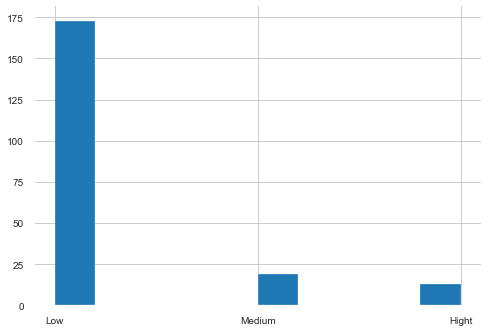

In [51]:
df['price_binned'].hist()

In [52]:
pd.get_dummies(df['fuel-type'])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0
